### **IMPORTANT NOTES**
#### **COLAB Machine Setup**
If starting a new Colab session, Please open the [colab_setup.ipynb](https://colab.research.google.com/github/khaledghobashy/smbd/blob/master/examples/colab_setup.ipynb) and run all cells.
A new Colab session does not mean a new Notebook session, you can have various notebook sessions on the same Colab session. The Colab session linked to your Google account expires in 12 hours, and so any data save on that remote machine will be lost.

#### **Package Path.**
The current ```pkg_path``` variable is where I have the repository on my machine. You should change it to where you cloned the repository on your machine.
For a Cloab session, the ```pkg_path``` variable is the one relevant to the repository path on the Colab remote machine. This should be used if you are running the notebook on Colab.

#### **Projects Directory**
- Colab.</br>
The ```projects_dir = 'contents/projects'``` variable should not be changed.
- Local Machine. </br>
You should change the ```projects_dir``` to match your desired directory where you store your projects.

--------------------------------------------------------------

In [ ]:
import sys

### Colab Session

In [ ]:
pkg_path = '/content/smbd'
sys.path.append(pkg_path)

In [ ]:
projects_dir = '/content/projects'

### Local Session

In [2]:
pkg_path = '/home/khaledghobashy/Documents/smbd'
sys.path.append(pkg_path)

In [ ]:
projects_dir = '/home/khaledghobashy/Documents/smbd/examples'

# STANDALONE STUDY
## **SPATIAL FOURBAR**
-----------------

### SYSTEM DISCRIPTION
---------------------

_Double click to write a discription here ..._

-----------------------------------------------

In [4]:
from smbd.interfaces.projects import initialize_project

In [5]:
project_name = 'spatial_fourbar'

In [6]:
initialize_project(projects_dir, project_name)

Current working dir : /home/khaledghobashy/Documents/smbd/examples/stewart_gough


## SYSTEM TOPOLOGY
-----------------

In [5]:
from smbd.interfaces.scripting import standalone_topology

In [6]:
sym_model = standalone_topology(project_name)

### ADDING BODIES

In [7]:
sym_model.add_body('l1')
sym_model.add_body('l2')
sym_model.add_body('l3')

### ADDING JOINTS

In [8]:
sym_model.add_joint.revolute('a','ground','rbs_l1')
sym_model.add_joint.spherical('b','rbs_l1','rbs_l2')
sym_model.add_joint.universal('c','rbs_l2','rbs_l3')
sym_model.add_joint.revolute('d','rbs_l3','ground')

### ADDING ACTUATORS

In [9]:
sym_model.add_actuator.rotational_actuator('act', 'jcs_a')

### ADDING FORCES

In [10]:
#model.add_force.internal_force('force_name', 'body_1', 'body_2', mirror=False)

### ASSEMBLING AND SAVING SYSTEM

In [11]:
sym_model.assemble_model()
sym_model.save()

### SYMBOLIC CHARACTERISTICS 

#### Checking the Topology Graph

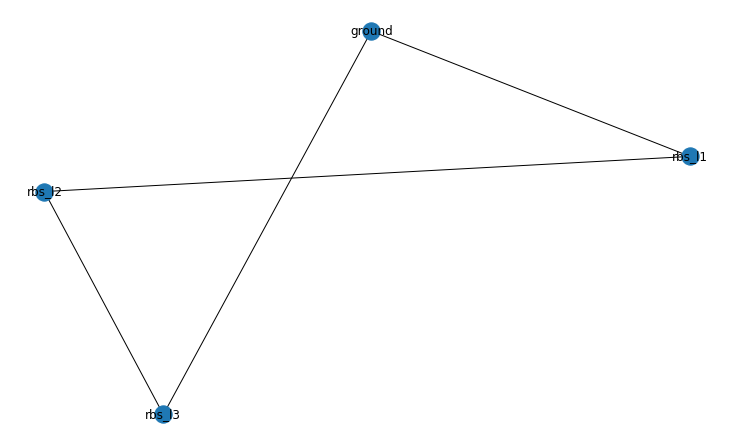

In [12]:
sym_model._mbs.draw_constraints_topology()

#### Checking the System Equations

In [13]:
sym_model._mbs.pos_equations

Matrix([
[                                                                                                                     A({P_{ground}})*{\bar{u}^{ground}_{jcs_a}} - A({P_{rbs_l1}})*{\bar{u}^{rbs_l1}_{jcs_a}} + {R_{ground}} - {R_{rbs_l1}}],
[                                                                                                                                               Mbar_ground_jcs_a[:,(0, 1)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_jcs_a[:,(2, 3)]],
[                                                                                                                                               Mbar_ground_jcs_a[:,(1, 2)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_jcs_a[:,(2, 3)]],
[(-sin(UF_mcs_act(t)))*Mbar_ground_mcs_act[:,(0, 1)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_mcs_act[:,(0, 1)] + cos(UF_mcs_act(t))*Mbar_ground_mcs_act[:,(1, 2)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_mcs_act[:,(0, 1)]],
[                                      

## SYSTEM CONFIGURATION
-----------------------

In [14]:
from smbd.interfaces.scripting import configuration

In [15]:
config_name = 'spatial_fourbar_cfg'
config = configuration(config_name, sym_model)

### CONFIGURATION INPUTS

In [16]:
config.add_point.UserInput('a')
config.add_point.UserInput('b')
config.add_point.UserInput('c')
config.add_point.UserInput('d')

config.add_vector.UserInput('x')
config.add_vector.UserInput('y')
config.add_vector.UserInput('z')

### CONFIGURATION RELATIONS

In [17]:
config.add_relation.Equal_to('pt1_jcs_a', ('hps_a',))
config.add_relation.Equal_to('pt1_jcs_b', ('hps_b',))
config.add_relation.Equal_to('pt1_jcs_c', ('hps_c',))
config.add_relation.Equal_to('pt1_jcs_d', ('hps_d',))

config.add_relation.Oriented('ax1_jcs_c', ('hps_b', 'hps_c'))
config.add_relation.Oriented('ax2_jcs_c', ('hps_c', 'hps_b'))

config.add_relation.Equal_to('ax1_jcs_a', ('vcs_x',))
config.add_relation.Equal_to('ax1_jcs_b', ('vcs_y',))
config.add_relation.Equal_to('ax1_jcs_d', ('vcs_z',))

config.add_relation.Equal_to('ax1_mcs_act', ('ax1_jcs_a',))


### CONFIGURATION GEOMETRIES

In [18]:
config.add_scalar.UserInput('links_ro')

config.add_geometry.Cylinder_Geometry('l1', ('hps_a','hps_b','s_links_ro'))
config.assign_geometry_to_body('rbs_l1', 'gms_l1')

config.add_geometry.Cylinder_Geometry('l2', ('hps_b','hps_c','s_links_ro'))
config.assign_geometry_to_body('rbs_l2', 'gms_l2')

config.add_geometry.Cylinder_Geometry('l3', ('hps_c','hps_d','s_links_ro'))
config.assign_geometry_to_body('rbs_l3', 'gms_l3')

### ASSEMBLING AND SAVING CONFIGURATION

In [19]:
config.assemble_model()
config.extract_inputs_to_csv()

## CODE GENERATION

In [20]:
from smbd.numenv.python.codegen import generators

In [21]:
model_code = generators.template_codegen(sym_model._mbs)
model_code.write_code_file()

File full path : spatial_fourbar.py


In [22]:
config_code = generators.configuration_codegen(config._config)
config_code.write_code_file()

File full path : spatial_fourbar_cfg.py


## NUMERICAL SIMULATION

In [23]:
import numpy as np
import pandas as pd

In [24]:
from smbd.numenv.python.interfaces.scripting import multibody_system, simulation

In [25]:
import spatial_fourbar, spatial_fourbar_cfg

In [26]:
num_model = multibody_system(spatial_fourbar)
num_model.topology.config = spatial_fourbar_cfg.configuration()

In [27]:
inputs_df = pd.read_csv('csv_files/spatial_fourbar_cfg.csv', index_col=0)
#inputs_df = config._config.create_inputs_dataframe()

In [28]:
inputs_df.loc['P_ground'] = [1, 0, 0, 0]

inputs_df.loc['hps_a'] = [0, 0, 0, 0]
inputs_df.loc['hps_b'] = [0, 0, 200, 0]
inputs_df.loc['hps_c'] = [-750, -850, 650,0]
inputs_df.loc['hps_d'] = [-400, -850, 0  ,0]

inputs_df.loc['vcs_x'] = [1,0,0,0]
inputs_df.loc['vcs_y'] = [0,1,0,0]
inputs_df.loc['vcs_z'] = [0,0,1,0]

inputs_df.loc['s_links_ro'] = [20,0,0,0]

In [29]:
inputs_df.to_csv('csv_files/spatial_fourbar_cfg_v1.csv')

In [30]:
num_model.topology.config.load_from_dataframe(inputs_df)

In [31]:
num_model.topology.config.UF_mcs_act = lambda t : np.deg2rad(360)*t

In [32]:
sim1 = simulation('sim1', num_model, 'kds')
sim1.set_time_array(1, 100)
sim1.solve()


Running System Kinematic Analysis:
Progress: [=========================] 100%, (99/99) steps.

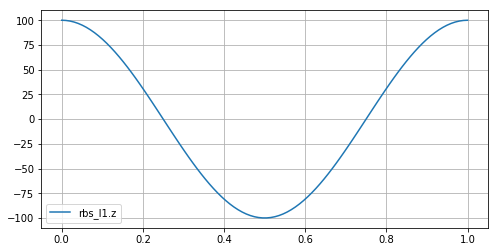

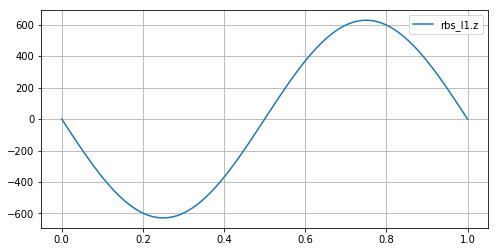

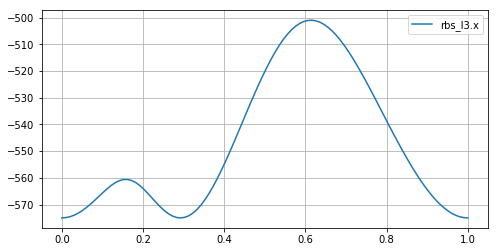

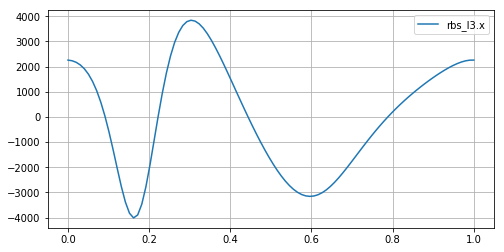

In [33]:
sim1.plot([('rbs_l1.z', 'pos')])
sim1.plot([('rbs_l1.z', 'vel')])
sim1.plot([('rbs_l3.x', 'pos')])
sim1.plot([('rbs_l3.x', 'acc')])